In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import r2_score, roc_auc_score

In [21]:
train = pd.read_csv("cleaned_million.csv")

In [22]:
drop_list = ['artist_location', 'artist_name', 'artist_id', 'artist_terms', 'artist_terms_freq', 'beats_start', 'artist_terms_weight', 'bars_confidence','bars_start', 'beats_confidence', 'release', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches','segments_start', 'segments_timbre', 'tatums_confidence', 'tatums_start', 'title', 'year']
train = train.drop(drop_list, axis=1)

In [23]:
train.head()

,Unnamed: 0,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence
0,1,0.626958,0.434860,NaN,NaN,252.99546,0.514,1.0,0.429,-11.061,0.0,0.670,0.475638,241.424,80.084,4.0,0.533
1,2,0.425724,0.000000,NaN,NaN,78.02730,0.974,3.0,0.000,-24.140,1.0,0.000,NaN,78.027,54.874,4.0,0.000
2,3,0.611495,0.334520,NaN,NaN,163.63057,0.000,7.0,0.380,-5.795,1.0,0.385,NaN,158.511,77.150,3.0,0.369
3,4,0.367255,0.311616,NaN,NaN,199.99302,0.000,10.0,0.551,-16.477,1.0,0.528,NaN,195.808,120.382,4.0,1.000
4,5,0.601306,0.363676,36.87652,-89.58828,279.35302,0.433,9.0,0.519,-12.474,1.0,0.491,0.445455,261.288,99.024,4.0,1.000


In [24]:
train = train.dropna(axis=0, how='any')

In [25]:
Y = copy.deepcopy(train.song_hotttnesss)
Y.shape

(2209,)

In [26]:
train = train.drop("song_hotttnesss", axis=1)
for i, row in train.iterrows():
    if train['mode'][i] == 1:
        train['mode'][i] = train['mode_confidence'][i]
    else:
        train['mode'][i] = -train['mode_confidence'][i]
train = train.drop('mode_confidence', axis=1)

In [27]:
print(train.shape, Y.shape)

(2209, 16) (2209,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.33, random_state=7)
model = XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 30.27%


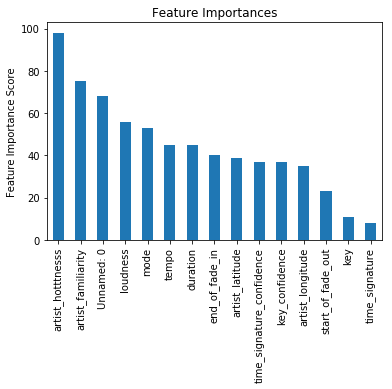

In [30]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

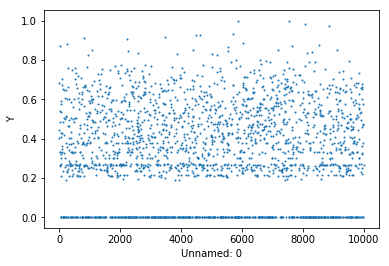

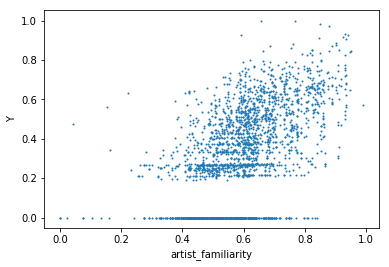

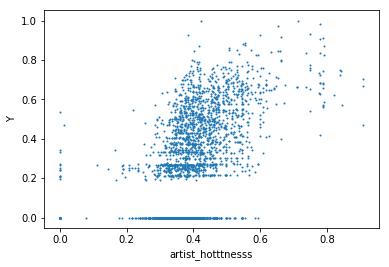

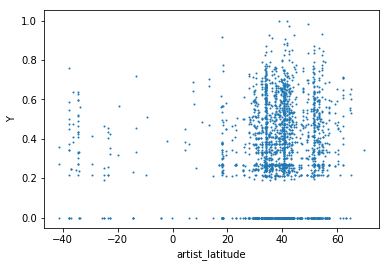

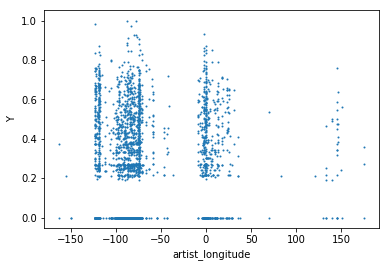

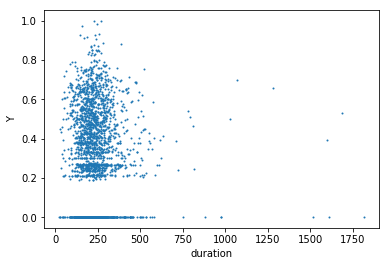

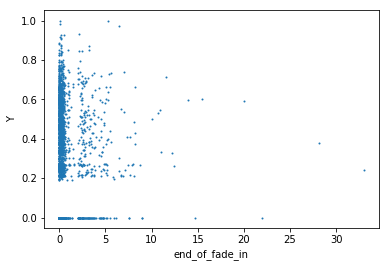

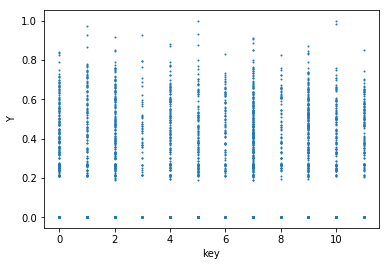

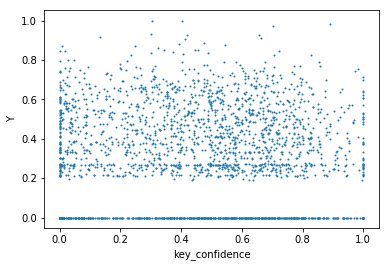

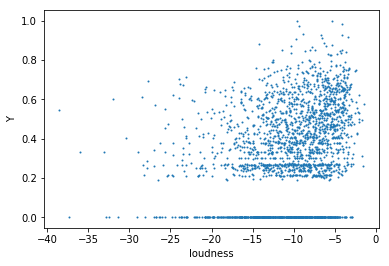

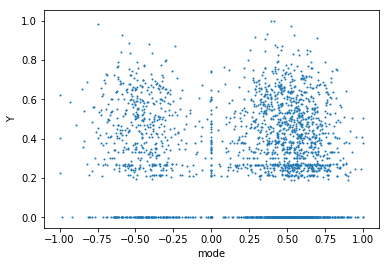

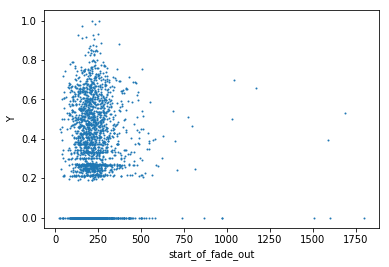

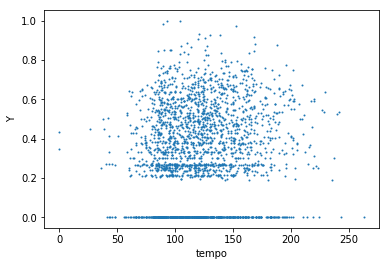

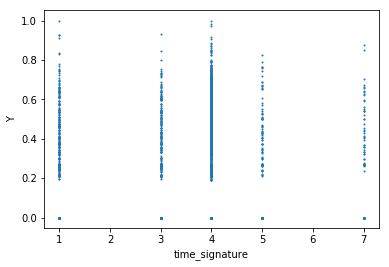

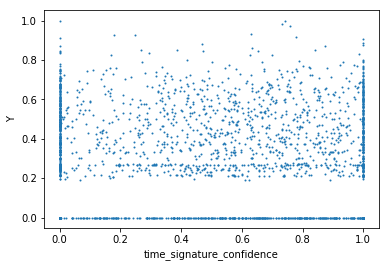

In [33]:
def scatter(x, y, xlabel, ylabel):
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

for f in train.columns:
    scatter(train[f], Y, f, 'Y')